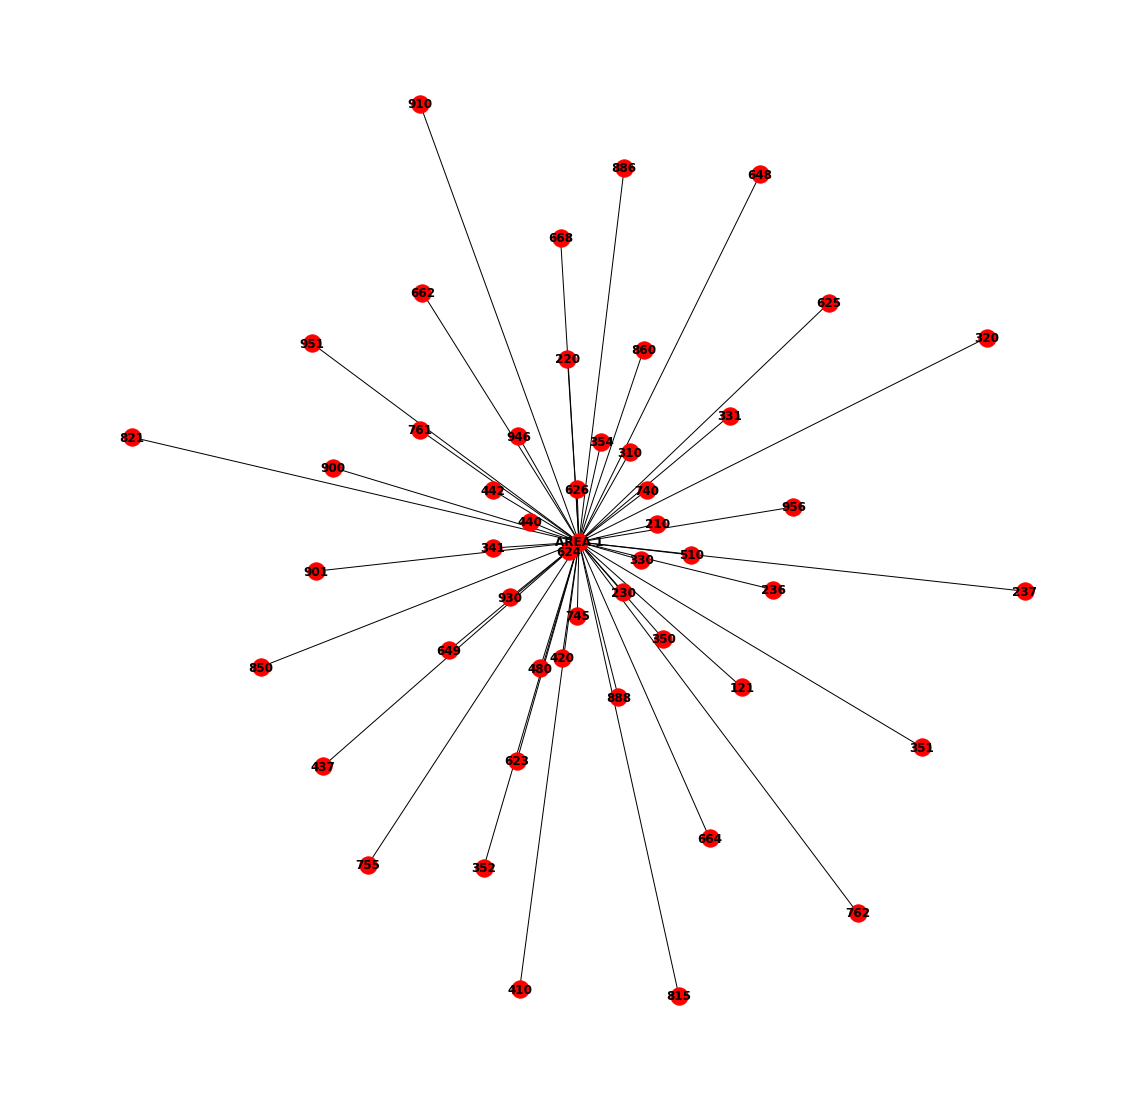

In [1]:
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import time
import scipy as sp
import numpy as np
import csv
%matplotlib inline


fi=open("a_1.csv", "r")
#G=nx.read_edgelist(fi, delimiter="\t", create_using=nx.DiGraph())
reader = csv.reader(fi, delimiter = ',')
data = []
G = nx.Graph()
G.add_node("AREA 1")
for row in reader:
    data.append(row)
    
for item in data:
    if(item[3] != 'Crime Code'):
        if(item[3] in G.nodes()):
            G["AREA 1"][item[3]]['weight'] += 1
        else:
            G.add_node(item[3])
            G.add_edge("AREA 1", item[3], weight=1)
while(len(G.nodes) > 50):  
    min = 100000000000
    minNode = None
    for node in G.nodes:
        if(node != "AREA 1"):
            if(G["AREA 1"] [node] ['weight'] < min):
                min = G["AREA 1"] [node] ['weight']
                minNode = node
    G.remove_node(minNode)

fi.close()
nx.write_graphml(G,"a_1.graphml")
plt.figure(1, figsize = (15,15))
nx.draw(G, with_labels=True, font_weight='bold')
#plt.show()
plt.savefig('labels.png')

# G1=nx.Graph()
# # Add nodes and edges
# G1.add_edge("Node1", "Node2")
# nx.draw(G1, with_labels = True)